In [329]:
import pandas as pd
import numpy as np
%matplotlib inline

!pip install geopandas
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
!pip install pcalg
import seaborn as sns

### 1. LOADING OF DATA + MERGING FOR QGIS VISUALIZATION

### 1.1 Loading of FOPH Data

In [2]:
#loading of the data
#try except so it works on both of our computers
try:
    #HannahFolder
    DATA_FOLDER = 'T:\\2021-10-22_10-03-52_BAGEPI-1086-cortes_study_data_cases.csv'
    FOPH_ATA = pd.read_csv(DATA_FOLDER, sep=';')
except:
    #MathiasFolder
    DATA_FOLDER = '/Volumes/FOPHDATA/2021-10-22_10-03-52_BAGEPI-1086-cortes_study_data_cases.csv'
    FOPH_ATA = pd.read_csv(DATA_FOLDER, sep=';')

FOPH_ATA.columns = ["ID" , "Case_dt", "Age", "Sex", "Kanton", "MuniName", 
       "MuniZIP", "VaccD1_dt", "VaccD2_dt", "VaccStatus", "Dead", "Death_dt", 
       "Hosp_dt", "Infection_dt"]
FOPH_ATA.head()

/Users/mathiasnuris/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Case_dt,Age,Sex,Kanton,MuniName,MuniZIP,VaccD1_dt,VaccD2_dt,VaccStatus,Dead,Death_dt,Hosp_dt,Infection_dt
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,NaN,NaN,2020-02-24,2020-02-24
1,a5ab42b7-188d-437c-a7a8-cc573fd36488,2020-02-25,25.0,Männlich,AG,Möriken-Wildegg,4203.0,NaN,NaN,unknown,NaN,NaN,2020-02-25,2020-02-26
2,7206a959-7ea9-4d41-9bd8-5e246339269e,2020-02-26,2.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26
3,183b5a64-34f2-4de5-9e49-3b29d604101f,2020-02-26,0.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26
4,e1900c37-23f5-4e9e-a817-7e30513ae17a,2020-02-26,28.0,Männlich,GE,Genève,6621.0,NaN,NaN,unknown,NaN,NaN,NaN,2020-02-26


### 1.2 Loading of Communitites Data

In [3]:
#loading of the data
#try except so it works on both of our computers
try:
    #HannahFolder
    path = '..'
    municipalities_data = pd.read_excel(path, sheet_name='Sheet1')
except:
    #MathiasFolder
    path = '../../Data/Add_comunitites/DataCommunities.xlsx'
    municipalities_data = pd.read_excel(path, sheet_name='Sheet1')

municipalities_data.columns = ["MuniZIP" , "MuniName", "NbrResident", "Change%", "PopDensitiyPer_km²", "Strangers%", 
       "Pop%[0-19]", "Pop%[20-64]", "Pop%[65-..]", "MarriageRate", "DivorceRate", "NatalityRate", "MortalityRate",
       "PrivateHouseholds", "MeanSizeHouseholdsPerPerson", "TotSurfacePer_km²", "HabitationInfrastructureSurface%", 
       "HabInfraSurface_VariationHa", "AgricolSurface%", "AgriSurface_VariationHa", "WoodenSurface%", "ImproductiveSurface%",
       "TotalEmplois", "Employement1Sector", "Employement2Sector", "Employement3Sector", "TotalEtablissement", 
       "Etablissement1Sector", "Etablissement2Sector", "Etablissement3Sector", "VacantUnitsRate", "NewHomes1000habs", 
       "SocialSecurityRate", "PLR", "PDC","PS","UDC","PEV/PCS","PVL","PBD","PST","PES","SmallRightParties"]

municipalities_data = municipalities_data.drop('MuniName', axis=1)
municipalities_data

,MuniZIP,NbrResident,Change%,PopDensitiyPer_km²,Strangers%,Pop%[0-19],Pop%[20-64],Pop%[65-..],MarriageRate,DivorceRate,...,PLR,PDC,PS,UDC,PEV/PCS,PVL,PBD,PST,PES,SmallRightParties
0,NaN,8606033,9.400000,215.200000,25.300000,20.000000,61.400000,18.700000,4.500000,2.000000,...,15.1,11.4,16.8,25.6,2.3,7.8,2.4,1,13.2,2.1
1,1.0,1981,8.607456,250.442478,14.184755,19.787986,62.190813,18.021201,7.065355,2.018673,...,16.421,2.49797,11.5651,30.381,3.22747,14.3173,1.26372,0.16211,15.0505,3.82065
2,2.0,12303,10.927779,1161.756374,28.700317,20.165813,61.667886,18.166301,5.543780,1.793576,...,13.3854,4.53534,14.6453,30.3069,6.61856,12.6666,2.00145,0.198718,12.5906,1.55552
3,3.0,5572,8.005427,749.932705,16.564968,23.636037,59.834889,16.529074,4.316547,1.798561,...,15.355,3.86796,16.7429,26.1163,4.19402,16.2379,1.28403,0.176013,12.3685,1.38502
4,4.0,3751,11.636905,275.808824,16.022394,22.180752,59.824047,17.995201,3.220612,1.610306,...,11.1352,3.93455,13.7115,33.1848,4.05976,12.417,1.61075,0.19312,16.7441,1.61075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,6806.0,559,1.821494,61.092896,7.155635,18.425760,56.887299,24.686941,7.279345,0.000000,...,19.0698,22.7907,17.907,21.1628,9.76744,*,*,*,9.30233,*
2169,6807.0,1238,-5.279265,53.732639,9.127625,21.728595,52.988691,25.282714,4.051864,0.810373,...,13.758,40.1274,23.5669,11.7197,3.82166,*,*,*,7.00637,*
2170,6808.0,1263,0.158604,20.453441,7.284244,18.289786,56.611243,25.098971,3.138486,1.569243,...,4.48239,33.2978,21.5582,14.301,10.2455,*,*,*,16.1153,*
2171,6809.0,1085,-6.060606,26.508673,8.387097,17.788018,55.483871,26.728111,5.504587,1.834862,...,8.39002,37.8685,19.3878,18.7075,4.19501,*,*,*,11.4512,*


In [4]:
municipalities_data.columns

Index(['MuniZIP', 'NbrResident', 'Change%', 'PopDensitiyPer_km²', 'Strangers%',
       'Pop%[0-19]', 'Pop%[20-64]', 'Pop%[65-..]', 'MarriageRate',
       'DivorceRate', 'NatalityRate', 'MortalityRate', 'PrivateHouseholds',
       'MeanSizeHouseholdsPerPerson', 'TotSurfacePer_km²',
       'HabitationInfrastructureSurface%', 'HabInfraSurface_VariationHa',
       'AgricolSurface%', 'AgriSurface_VariationHa', 'WoodenSurface%',
       'ImproductiveSurface%', 'TotalEmplois', 'Employement1Sector',
       'Employement2Sector', 'Employement3Sector', 'TotalEtablissement',
       'Etablissement1Sector', 'Etablissement2Sector', 'Etablissement3Sector',
       'VacantUnitsRate', 'NewHomes1000habs', 'SocialSecurityRate', 'PLR',
       'PDC', 'PS', 'UDC', 'PEV/PCS', 'PVL', 'PBD', 'PST', 'PES',
       'SmallRightParties'],
      dtype='object')

### 1.3 Merging FOPH Data & Municipalities Data according to "MuniZIP"

In [5]:
data_augmented = pd.merge(FOPH_ATA, municipalities_data, left_on='MuniZIP', right_on='MuniZIP', how='inner')
data_augmented

,ID,Case_dt,Age,Sex,Kanton,MuniName,MuniZIP,VaccD1_dt,VaccD2_dt,VaccStatus,...,PLR,PDC,PS,UDC,PEV/PCS,PVL,PBD,PST,PES,SmallRightParties
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,20.3399,13.9847,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938
1,34c16d61-49b4-4fc8-8375-6025b8a27fa0,2020-03-01,81.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,20.3399,13.9847,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938
2,f6c98490-e001-4e6d-9444-ec898de23b40,2020-03-02,50.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,20.3399,13.9847,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938
3,1db5127e-9df7-4ce2-a031-d6f7fdffe532,2020-03-02,47.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,20.3399,13.9847,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938
4,9f724fa8-4a4b-4e77-b5a5-fef7aecdfd39,2020-03-02,64.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,20.3399,13.9847,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734604,63ffcdea-8151-424a-872b-89a3321c7a0a,2021-02-15,23.0,Männlich,VS,Zwischbergen,6011.0,NaN,NaN,unknown,...,1.67364,37.2385,1.25523,58.5774,0,0,*,*,1.25523,*
734605,86ae4fff-6c52-4a08-a027-4bc29ca018c0,2021-03-23,45.0,Männlich,BE,Willadingen,423.0,NaN,NaN,unknown,...,4.66563,0.583204,8.20373,60.4588,1.01089,7.89269,9.52566,0,5.521,0.972006
734606,34627bc7-1f19-4dbd-8279-7966a9059bab,2021-04-01,32.0,Weiblich,BE,Willadingen,423.0,NaN,NaN,unknown,...,4.66563,0.583204,8.20373,60.4588,1.01089,7.89269,9.52566,0,5.521,0.972006
734607,234ca50b-22ec-46e0-812a-d6d662845267,2021-04-07,40.0,Weiblich,VS,Binn,6054.0,NaN,NaN,unknown,...,0.488998,73.1051,3.42298,17.1149,0,0,*,*,5.86797,*


### 1.4 Merging with GPS Data according to "MuniZIP"

In [6]:
#loading of the data
#try except so it works on both of our computers
try:
    #HannahFolder
    path = '..'
    GPS_coordinates = pd.read_excel(path, sheet_name='Sheet1')
except:
    #MathiasFolder
    path = '../../Data/Add_comunitites/try.csv'
    GPS_coordinates = pd.read_csv(path, sep=',')
GPS_coordinates = GPS_coordinates[GPS_coordinates['country code']=='CH']
GPS_coordinates['communitycode'] = GPS_coordinates['communitycode'].astype(float, errors = 'raise')
GPS_coordinates['longitude'] = GPS_coordinates['longitude'].astype(float, errors = 'raise')
GPS_coordinates.head()

/Users/mathiasnuris/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,4,6,7,8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country code,postal code,place,state,statecode,province_or_county,province_or_countycode,community,communitycode,latitude,longitude,accuracy,Country,Continent;
30217,CH,5000,Aarau,Kanton Aargau,AG,Bezirk Aarau,1901,Aarau,4001.0,47.3925,8.0442,4,Switzerland,Europe;
30218,CH,5001,Aarau 1,Kanton Aargau,AG,Bezirk Aarau,1901,Aarau,4001.0,47.3888,8.0483,NaN,Switzerland,Europe;
30219,CH,5004,Aarau,Kanton Aargau,AG,Bezirk Aarau,1901,Aarau,4001.0,47.3925,8.0442,4,Switzerland,Europe;
30220,CH,5017,Barmelweid,Kanton Aargau,AG,Bezirk Aarau,1901,Erlinsbach (AG),4005.0,47.4159,7.9764,4,Switzerland,Europe;
30221,CH,5018,Erlinsbach,Kanton Aargau,AG,Bezirk Aarau,1901,Erlinsbach (AG),4005.0,47.4052,8.0151,4,Switzerland,Europe;


In [7]:
copy = GPS_coordinates[['communitycode','latitude', 'longitude']]
copy = copy.drop_duplicates(subset=['communitycode'], keep='last')
final = pd.merge(data_augmented, copy, left_on='MuniZIP', right_on='communitycode', how='inner')
final = final.drop('communitycode', axis=1)
final.head()

,ID,Case_dt,Age,Sex,Kanton,MuniName,MuniZIP,VaccD1_dt,VaccD2_dt,VaccStatus,...,PS,UDC,PEV/PCS,PVL,PBD,PST,PES,SmallRightParties,latitude,longitude
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961
1,34c16d61-49b4-4fc8-8375-6025b8a27fa0,2020-03-01,81.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961
2,f6c98490-e001-4e6d-9444-ec898de23b40,2020-03-02,50.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961
3,1db5127e-9df7-4ce2-a031-d6f7fdffe532,2020-03-02,47.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961
4,9f724fa8-4a4b-4e77-b5a5-fef7aecdfd39,2020-03-02,64.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.917,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961


In [95]:
essai = final.copy()
dummies = pd.get_dummies(essai['Infection_dt'])
essai = essai.join(dummies)
essai.head()

,ID,Case_dt,Age,Sex,Kanton,MuniName,MuniZIP,VaccD1_dt,VaccD2_dt,VaccStatus,...,2021-09-03,2021-09-04,2021-09-06,2021-09-09,2021-09-12,2021-09-13,2021-09-17,2021-09-23,2021-09-24,2021-09-30
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,0,0,0,0,0,0,0,0,0,0
1,34c16d61-49b4-4fc8-8375-6025b8a27fa0,2020-03-01,81.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,0,0,0,0,0,0,0,0,0,0
2,f6c98490-e001-4e6d-9444-ec898de23b40,2020-03-02,50.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,0,0,0,0,0,0,0,0,0,0
3,1db5127e-9df7-4ce2-a031-d6f7fdffe532,2020-03-02,47.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,0,0,0,0,0,0,0,0,0,0
4,9f724fa8-4a4b-4e77-b5a5-fef7aecdfd39,2020-03-02,64.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,0,0,0,0,0,0,0,0,0,0


In [295]:
df = essai.groupby('MuniZIP')[dummies.columns].agg(['count'])
df[:]=0
df

,2020-02-24,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2021-09-03,2021-09-04,2021-09-06,2021-09-09,2021-09-12,2021-09-13,2021-09-17,2021-09-23,2021-09-24,2021-09-30
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
MuniZIP,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6807.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
date='2020-03-03'
before = df.loc[final[final['Infection_dt']==date].MuniZIP.values[0], date]
df.loc[final[final['Infection_dt']==date].MuniZIP.values[0], date] = before + 1
df.loc[final[final['Infection_dt']==date].MuniZIP.values[0], date]

count   NaN
Name: 5192.0, dtype: float64

In [306]:
for date in dummies.columns : 
    MuniZIP = final[final['Infection_dt']=='2020-03-03'].MuniZIP
    for ZIP in range (len(MuniZIP)) : 
        df.at[final[final['Infection_dt']==date].MuniZIP.values[ZIP], date] =
        df.loc[final[final['Infection_dt']==date].MuniZIP.values[ZIP], date]+1

IndexError: index 1 is out of bounds for axis 0 with size 1

In [282]:
df.at[final[final[df.at[final[final['Infection_dt']==date].MuniZIP, date]=df.loc[final[final['Infection_dt']==date].MuniZIP, date].values+1]==date].MuniZIP, date]=df.loc[final[final['Infection_dt']==date].MuniZIP, date].values+1
df

,2020-02-24,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2021-09-03,2021-09-04,2021-09-06,2021-09-09,2021-09-12,2021-09-13,2021-09-17,2021-09-23,2021-09-24,2021-09-30
MuniZIP,,,,,,,,,,,,,,,,,,,,,
1.0,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
2.0,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062,...,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062
3.0,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
4.0,173,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
5.0,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806.0,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
6807.0,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
6808.0,169,169,169,169,169,169,169,169,169,169,...,169,169,169,169,169,169,169,169,169,169


In [351]:
date='2020-02-24'
final[final['Infection_dt']==date].groupby('MuniZIP')['MuniZIP'].agg(['count'])

pandas.core.frame.DataFrame

In [343]:
i=0
for date in df.columns:
    i+=1
    if i>1 and i<562:
        df[df.columns[i]] = final[final['Infection_dt']==date].groupby('MuniZIP')['MuniZIP'].agg(['count'])
        df[df.columns[i]] += df[df.columns[i-1]]
df

,2020-02-24,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2021-09-03,2021-09-04,2021-09-06,2021-09-09,2021-09-12,2021-09-13,2021-09-17,2021-09-23,2021-09-24,2021-09-30
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
MuniZIP,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6807.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [270]:
date='2020-03-31'
print(df['2020-03-31'])
df.at[final[final['Infection_dt']==date].MuniZIP, date]=df.loc[final[final['Infection_dt']==date].MuniZIP, date].values+1
print(df['2020-03-31'])

MuniZIP
1.0       0
2.0       0
3.0       0
4.0       0
5.0       0
         ..
6806.0    0
6807.0    0
6808.0    0
6809.0    0
6810.0    0
Name: 2020-03-31, Length: 2161, dtype: int64
MuniZIP
1.0       1
2.0       0
3.0       0
4.0       1
5.0       0
         ..
6806.0    0
6807.0    0
6808.0    0
6809.0    0
6810.0    0
Name: 2020-03-31, Length: 2161, dtype: int64


In [199]:
df[date]

MuniZIP
1.0       0
2.0       0
3.0       0
4.0       0
5.0       0
         ..
6806.0    0
6807.0    0
6808.0    0
6809.0    0
6810.0    0
Name: 2020-03-01, Length: 2161, dtype: int64

In [215]:
final[final['Infection_dt']=='2020-03-01'].MuniZIP

1        5192.0
6517     6621.0
6518     6621.0
44294     261.0
44295     261.0
85692    6285.0
86563    2125.0
90241    4309.0
90242    4309.0
90554    1709.0
Name: MuniZIP, dtype: float64

In [218]:
df.loc[6621.0, date]

2

In [250]:
final[final['MuniZIP']==1.0]['Infection_dt']

681701    2020-03-31
681702    2020-04-20
681703    2020-08-26
681704    2020-09-05
681705    2020-09-30
             ...    
681804    2021-05-11
681805    2021-05-11
681806    2021-05-19
681807    2021-05-19
681808    2021-08-06
Name: Infection_dt, Length: 108, dtype: object

In [258]:
date='2021-05-11'
#df.at[final[final['Infection_dt']==date].MuniZIP, date]=df.loc[final[final['Infection_dt']==date].MuniZIP, date].values+1
df.loc[1.0,date]
to_implement = final[final['Infection_dt']==date].MuniZIP
for i in to_implement: 
    df.at[i, date]=df.loc[i, date]+1
df['2021-05-11']

MuniZIP
1.0       5
2.0       3
3.0       7
4.0       0
5.0       0
         ..
6806.0    0
6807.0    0
6808.0    0
6809.0    0
6810.0    3
Name: 2021-05-11, Length: 2161, dtype: int64

In [280]:
date='2021-05-11'
to_implement = final[final['Infection_dt']==date].MuniZIP
to_implement[5816]

5192.0

In [266]:
i=0
for date in df.columns : 
    
    i+=1
    if i>1 and i<562:
        df[df.columns[i]] = df[df.columns[i-1]]
        
    to_implement = final[final['Infection_dt']==date].MuniZIP
    for i in to_implement: 
        df.at[final[final['Infection_dt']==date].MuniZIP, date]=df.loc[final[final['Infection_dt']==date].MuniZIP, date].values+1

<ipython-input-266-e8a720fb64b8>:6: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  df[df.columns[i]] = df[df.columns[i-1]]


In [267]:
df.loc[5192.0, date]

0

In [124]:
final[final['Infection_dt']=='2020-02-26'].MuniZIP

6176    4203.0
6512    6621.0
Name: MuniZIP, dtype: float64

In [90]:
final.columns

Index(['ID', 'Case_dt', 'Age', 'Sex', 'Kanton', 'MuniName', 'MuniZIP',
       'VaccD1_dt', 'VaccD2_dt', 'VaccStatus', 'Dead', 'Death_dt', 'Hosp_dt',
       'Infection_dt', 'NbrResident', 'Change%', 'PopDensitiyPer_km²',
       'Strangers%', 'Pop%[0-19]', 'Pop%[20-64]', 'Pop%[65-..]',
       'MarriageRate', 'DivorceRate', 'NatalityRate', 'MortalityRate',
       'PrivateHouseholds', 'MeanSizeHouseholdsPerPerson', 'TotSurfacePer_km²',
       'HabitationInfrastructureSurface%', 'HabInfraSurface_VariationHa',
       'AgricolSurface%', 'AgriSurface_VariationHa', 'WoodenSurface%',
       'ImproductiveSurface%', 'TotalEmplois', 'Employement1Sector',
       'Employement2Sector', 'Employement3Sector', 'TotalEtablissement',
       'Etablissement1Sector', 'Etablissement2Sector', 'Etablissement3Sector',
       'VacantUnitsRate', 'NewHomes1000habs', 'SocialSecurityRate', 'PLR',
       'PDC', 'PS', 'UDC', 'PEV/PCS', 'PVL', 'PBD', 'PST', 'PES',
       'SmallRightParties', 'latitude', 'longitude', 'geo

In [80]:
final.columns

Index(['ID', 'Case_dt', 'Age', 'Sex', 'Kanton', 'MuniName', 'MuniZIP',
       'VaccD1_dt', 'VaccD2_dt', 'VaccStatus', 'Dead', 'Death_dt', 'Hosp_dt',
       'Infection_dt', 'NbrResident', 'Change%', 'PopDensitiyPer_km²',
       'Strangers%', 'Pop%[0-19]', 'Pop%[20-64]', 'Pop%[65-..]',
       'MarriageRate', 'DivorceRate', 'NatalityRate', 'MortalityRate',
       'PrivateHouseholds', 'MeanSizeHouseholdsPerPerson', 'TotSurfacePer_km²',
       'HabitationInfrastructureSurface%', 'HabInfraSurface_VariationHa',
       'AgricolSurface%', 'AgriSurface_VariationHa', 'WoodenSurface%',
       'ImproductiveSurface%', 'TotalEmplois', 'Employement1Sector',
       'Employement2Sector', 'Employement3Sector', 'TotalEtablissement',
       'Etablissement1Sector', 'Etablissement2Sector', 'Etablissement3Sector',
       'VacantUnitsRate', 'NewHomes1000habs', 'SocialSecurityRate', 'PLR',
       'PDC', 'PS', 'UDC', 'PEV/PCS', 'PVL', 'PBD', 'PST', 'PES',
       'SmallRightParties', 'latitude', 'longitude', 'geo

In [88]:
final['Infection_dt']

0         2020-02-24
1         2020-03-01
2         2020-03-02
3         2020-03-03
4         2020-03-03
             ...    
716484    2021-02-15
716485    2021-03-23
716486    2021-04-01
716487    2021-04-08
716488    2021-04-08
Name: Infection_dt, Length: 716489, dtype: object

In [87]:
if final['Infection_dt'][0]<final['Infection_dt'][1]:
    print('ahhh')

ahhh


In [82]:
#computing dummies for 'genre' feature
genre_dummies = pd.get_dummies(df['Infection_dt'])
genre_dummies= genre_dummies.rename(columns=str.lower)
genre_dummies = genre_dummies.add_suffix('_onehot')
df_task2 = df.join(genre_dummies)
df_task2.head()

0         2020-02-24
1         2020-03-01
2         2020-03-02
3         2020-03-03
4         2020-03-03
             ...    
716484    2021-02-15
716485    2021-03-23
716486    2021-04-01
716487    2021-04-08
716488    2021-04-08
Name: Infection_dt, Length: 716489, dtype: object

In [63]:
group_municipality = final.groupby('MuniZIP').apply(lambda m : pd.Series({
        'count_dead' : m['Dead'].count()
    }))
group_municipality = pd.DataFrame(group_municipality)

### Create GeoDataFrame

In [44]:
gdf = geopandas.GeoDataFrame(
    final, geometry=geopandas.points_from_xy(final.longitude, final.latitude))
gdf.head()

,ID,Case_dt,Age,Sex,Kanton,MuniName,MuniZIP,VaccD1_dt,VaccD2_dt,VaccStatus,...,UDC,PEV/PCS,PVL,PBD,PST,PES,SmallRightParties,latitude,longitude,geometry
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961,POINT (8.99610 46.01150)
1,34c16d61-49b4-4fc8-8375-6025b8a27fa0,2020-03-01,81.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961,POINT (8.99610 46.01150)
2,f6c98490-e001-4e6d-9444-ec898de23b40,2020-03-02,50.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961,POINT (8.99610 46.01150)
3,1db5127e-9df7-4ce2-a031-d6f7fdffe532,2020-03-02,47.0,Weiblich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961,POINT (8.99610 46.01150)
4,9f724fa8-4a4b-4e77-b5a5-fef7aecdfd39,2020-03-02,64.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,...,13.148,*,1.01226,*,0.903688,11.139,21.5938,46.0115,8.9961,POINT (8.99610 46.01150)


In [45]:
zipfile = "../../Data/GeoData/SHAPEFILE_LV95_LN02/swissBOUNDARIES3D_1_3_TLM_HOHEITSGEBIET.shp"
second = geopandas.read_file(zipfile)
second.head()

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,REVISION_Q,NAME,KANTONSNUM,ICC,EINWOHNERZ,BFS_NUMMER,GEM_TEIL,GEM_FLAECH,SHN,geometry
0,{D5A9677C-FE38-44F6-B0E8-3177F6252C81},2020-11-03,2008-11-24,2000,1,2021,7,Verbessert,AV,2020,...,2020_Aufbau,Scuol,18.0,CH,4624.0,3762,0,43861.0,CH18433762,"POLYGON Z ((2812956.113 1194956.023 2980.122, ..."
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2020-11-03,2008-11-24,2006,1,2021,7,Verbessert,AV,2020,...,2020_Aufbau,Glarus Süd,8.0,CH,9453.0,1631,0,43003.0,CH08001631,"POLYGON Z ((2715953.052 1184819.358 3402.836, ..."
2,{AB2BA4A5-EB8C-40C7-A259-271DAC93C767},2020-11-03,2008-11-24,2000,1,2021,7,Verbessert,AV,2020,...,2020_Aufbau,Zernez,18.0,CH,1523.0,3746,0,34404.0,CH18433746,"POLYGON Z ((2803369.136 1191207.211 3111.081, ..."
3,{550D0610-1EE3-4748-8F29-88072753FFDC},2020-11-03,2008-11-24,2000,1,2021,7,Verbessert,AV,2020,...,2020_Aufbau,Surses,18.0,CH,2327.0,3543,0,32377.0,CH18413543,"POLYGON Z ((2757776.421 1165789.462 2730.100, ..."
4,{5B0C1705-1D2B-4E53-9970-6BC3DE33A0F7},2020-11-03,2008-11-24,1997,1,2021,7,Verbessert,AV,2020,...,2020_Aufbau,Val de Bagnes,23.0,CH,10185.0,6037,0,30191.0,CH23036037,"POLYGON Z ((2588810.990 1085590.669 3576.258, ..."


In [31]:
second = second[['BFS_NUMMER', 'geometry']]
second = second.drop_duplicates(subset=['BFS_NUMMER'], keep='last')

In [ ]:
geodata = pd.merge(final, second, left_on='MuniZIP', right_on='BFS_NUMMER', how='inner')
geodata = geodata.drop('BFS_NUMMER', axis=1)
geodata.head()

In [73]:
geodata = pd.merge(group_municipality, second, left_on='MuniZIP', right_on='BFS_NUMMER', how='inner')
geodata = geodata.drop('BFS_NUMMER', axis=1)
geodata = geopandas.GeoDataFrame(
    geodata)
geodata.head()

,count_dead,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,...,SEE_FLAECH,REVISION_Q,NAME,KANTONSNUM,ICC,EINWOHNERZ,GEM_TEIL,GEM_FLAECH,SHN,geometry
0,3,{95019894-192B-4961-B48D-A4D473BE0EC7},2020-11-03,2008-11-24,2001,1,2021,7,Verbessert,AV,...,NaN,2020_Aufbau,Aeugst am Albis,1.0,CH,1981.0,0,791.0,CH01010001,"POLYGON Z ((2680604.962 1236344.185 720.723, 2..."
1,45,{64391164-AD70-40D0-B5FB-C7C7745E4CAD},2020-11-03,2008-11-24,2001,1,2021,7,Verbessert,AV,...,NaN,2020_Aufbau,Affoltern am Albis,1.0,CH,12303.0,0,1059.0,CH01010002,"POLYGON Z ((2673825.715 1238537.954 463.844, 2..."
2,2,{7CBD1DE5-0F61-4D98-BC42-6DAA2D5FE2FF},2020-11-03,2008-11-24,1997,1,2021,7,Verbessert,AV,...,NaN,2020_Aufbau,Bonstetten,1.0,CH,5572.0,0,743.0,CH01010003,"POLYGON Z ((2675810.595 1241034.379 579.469, 2..."
3,3,{DE57B97A-7C70-4D82-819B-91612A0B84CF},2020-11-03,2008-11-24,1997,1,2021,7,Verbessert,AV,...,NaN,2020_Aufbau,Hausen am Albis,1.0,CH,3751.0,0,1360.0,CH01010004,"POLYGON Z ((2686028.446 1230192.476 545.697, 2..."
4,4,{8FAFC264-C105-4268-A920-B2393E7BBF9F},2020-11-03,2008-11-24,1997,1,2021,7,Verbessert,AV,...,NaN,2020_Aufbau,Hedingen,1.0,CH,3778.0,0,653.0,CH01010005,"POLYGON Z ((2675425.180 1240959.266 609.315, 2..."


<AxesSubplot:xlabel='count_dead', ylabel='Count'>

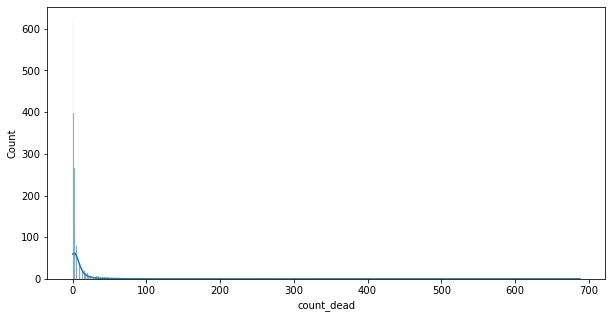

In [331]:
#plot of the average score per year
fig = plt.figure(figsize=(10,5))
sns.histplot(geodata, kde=True, x='count_dead', binwidth = 0.5)

<AxesSubplot:>

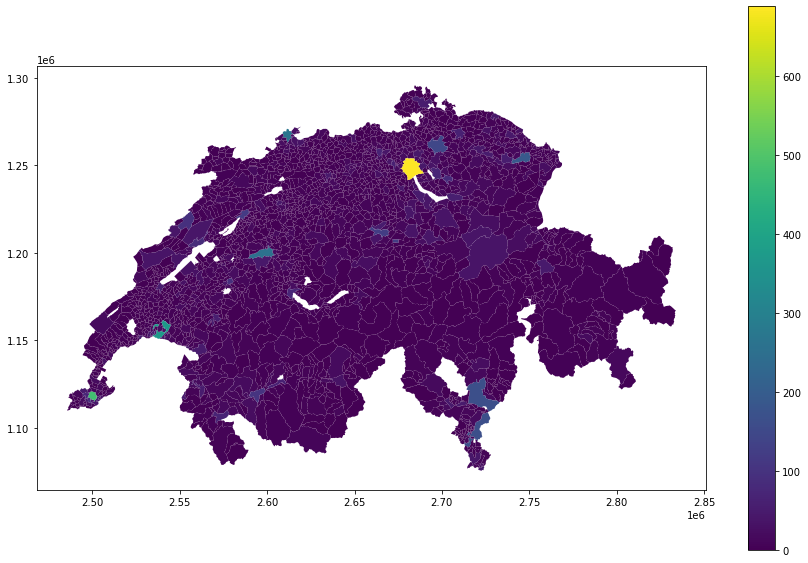

In [325]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15,10))
geodata.plot(column='count_dead', ax=ax, legend=True)

<AxesSubplot:>

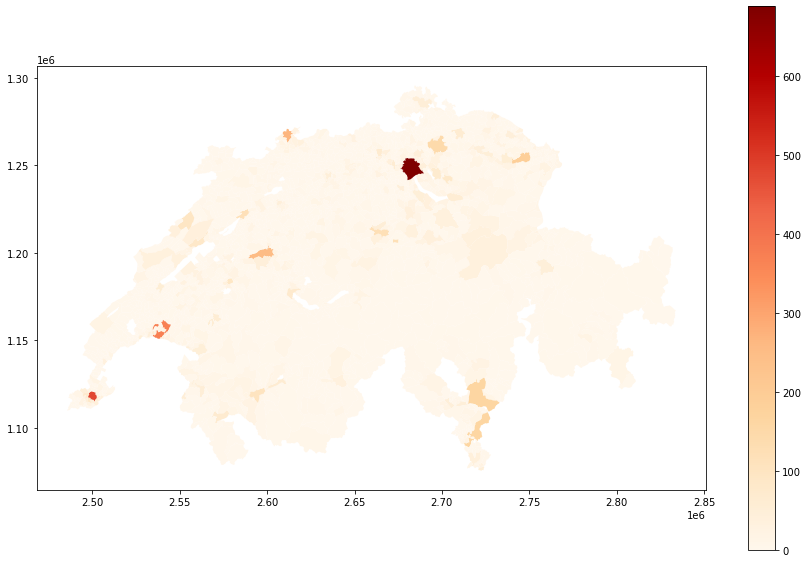

In [333]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15,10))
geodata.plot(column='count_dead', ax=ax, legend=True, cmap='OrRd' ,
             classification_kwds = {'bins' :[10,20,30,40,50,60,70,80,90, 100, 150, 200, 400, 600]})

In [30]:
essai = geodata[['geometry_y', 'geometry_x', 'MuniZIP', 'Age']]
essai['geometry_y']

0         POLYGON Z ((2715715.210 1097324.740 340.729, 2...
1         POLYGON Z ((2715715.210 1097324.740 340.729, 2...
2         POLYGON Z ((2715715.210 1097324.740 340.729, 2...
3         POLYGON Z ((2715715.210 1097324.740 340.729, 2...
4         POLYGON Z ((2715715.210 1097324.740 340.729, 2...
                                ...                        
715771    POLYGON Z ((2649856.640 1121563.113 3372.583, ...
715772    POLYGON Z ((2613903.756 1222470.731 459.587, 2...
715773    POLYGON Z ((2613903.756 1222470.731 459.587, 2...
715774    POLYGON Z ((2659117.244 1128627.826 2498.386, ...
715775    POLYGON Z ((2659117.244 1128627.826 2498.386, ...
Name: geometry_y, Length: 715776, dtype: geometry

In [24]:
Municipalitiy_grp = essai.groupby('MuniZIP').agg(['count'])
Municipalitiy_grp.head()

KeyboardInterrupt: 

In [ ]:
# We restrict to South America.
ax = gdf.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
import geoplot

ax = geoplot.kdeplot(
    gdf, clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

### 2. EXPLORATORY DATA ANALYSIS OF FOPH DATA


In [ ]:
data_augmented.columns

In [ ]:
#Correct the VaccStatus as dummies
VaccStatus_dummies = pd.get_dummies(data_augmented['VaccStatus'])
VaccStatus_dummies= VaccStatus_dummies.rename(columns=str.lower)
VaccStatus_dummies = VaccStatus_dummies.add_suffix('_onehot')
EDA = data_augmented.join(VaccStatus_dummies)
EDA.head()

### 2.1 Describing dataset

In [ ]:
print(EDA.info())

In [ ]:
describe = EDA.describe(include = 'all')
describe.loc['dtype'] = EDA.dtypes
describe.loc['size'] = len(EDA)
describe.loc['% count'] = EDA.isnull().mean()
describe

In [ ]:
EDA['VaccStatus'].value_counts()

In [ ]:
EDA['Infection_dt'].value_counts()

### 2.2 Creating age groups

In [ ]:
age_group_len=5
bins = np.arange(start=0, stop=EDA['Age'].max(), step=age_group_len)
EDA['Age_group']= pd.cut(EDA['Age'], bins)

In [ ]:
group_age = EDA.groupby(['Age_group']).apply(lambda m : pd.Series({
        'max_age' : m.Age.max(),
        'count' : len(m),
        '%death' : len(m[m['Dead']==1])/len(m),
        '%fully_vaccinated_onehot' : len(m[m['fully_vaccinated_onehot']==1])/len(m),
        '%not_vaccinated_onehot' : len(m[m['not_vaccinated_onehot']==1])/len(m),
        '%partially_vaccinated_onehot' : len(m[m['partially_vaccinated_onehot']==1])/len(m),
        '%unknown_onehot' : len(m[m['unknown_onehot']==1])/len(m)
    }))
group_age.head()

In [ ]:
tab = group_age.columns
tab = tab.drop('max_age')
tab

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
group_age[tab].plot(subplots=True, ax=axes)

TODO :
FOPH is not a sample of the population, it is all the population who got tested in Lausanne
- plot socio-economics data, use the CH_CSV data for plotting the sampled data
- make it work with infected cases per capita, do it with DeltaT=week/two-weeeks/month
- paraview for displaying like a video